# Decision Tree Classifier

In [43]:
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [52]:
cleaned_dataset = pd.read_csv('../preparation/dataframes/cleaned_dataset.csv', index_col=0)
X = cleaned_dataset.drop('outcome', axis=1)
y = cleaned_dataset['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## Initial inspection

[Text(0.5, 0.75, 'elo_away <= 85.5\ngini = 0.641\nsamples = 96464\nvalue = [24688, 27130, 44646]\nclass = Away Win'),
 Text(0.25, 0.25, 'gini = 0.632\nsamples = 86987\nvalue = [20275, 24665, 42047]\nclass = Away Win'),
 Text(0.75, 0.25, 'gini = 0.64\nsamples = 9477\nvalue = [4413, 2465, 2599]\nclass = Home Win')]

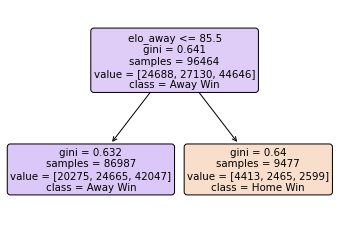

In [10]:
feature_names = [
    'round', 'home_scored_sofar', 'away_scored_sofar', 'home_conceeded_sofar', 'away_conceeded_sofar',
    'home_points_sofar', 'away_points_sofar', 'elo_home', 'elo_away', 'home_form', 'away_form']
class_names = ['Home Win', 'Draw', 'Away Win']

model = DecisionTreeClassifier(max_depth=1, random_state=13)
model.fit(X_train, y_train) 
plot_tree(model, feature_names=feature_names, filled=True, rounded=True, class_names=class_names)

Using a max depth of 1 reveals the root node.

## Tuning Hyperparamters

### Hyperparamters to be tuned
1. ```criterion```
    - A loss function to measure the impurity of the split
2. ```max_depth```
    - The maximum depth of the tree


In [53]:
scores = {}
scores_list = []
for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test, y_pred))

In [54]:
px.line(
    x=range(1, 10),
    y=scores_list,
    labels={'x': 'Max depth for Decision Tree Classifier', 'y': 'Testing Accuracy'},
    title='The accuracy score of the K-Nearest Neighbours Classifier as Max Depth is varied')

With the default value of ```criterion``` set to the Gini Impurity function, the most accurate model comes from a max depth value of 5. However, K-Fold Cross Validation and Grid Search will be used with values 4, 5 and 6 to identify if changing the ```criterion``` will lead to a higher accuracy from a value of a max depth other than 5.

In [55]:
criterion = ['gini', 'log_loss']
max_depth = list(range(4, 7))
hyperparameters = dict(max_depth=max_depth, criterion=criterion)

decision_tree = DecisionTreeClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(decision_tree, hyperparameters, cv=kfold)
best_model = clf.fit(X, y)

print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Best criterion: log_loss
Best max_depth: 5


In [56]:
model = DecisionTreeClassifier(criterion='log_loss', max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Best Accuracy: {accuracy_score(y_test, y_pred)}')

Best Accuracy: 0.49118878799187293


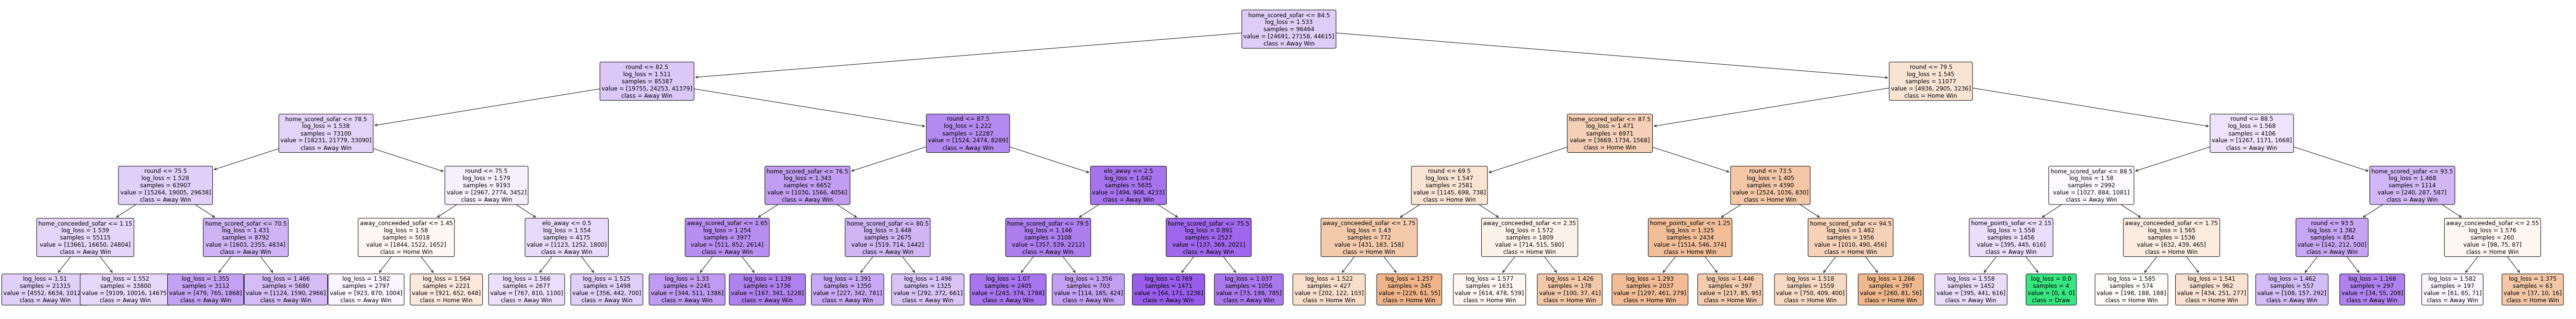

In [57]:
plt.figure(figsize=(96,12))
tree = plot_tree(model, feature_names=feature_names, filled=True, rounded=True, class_names=class_names, fontsize=12)
plt.show()

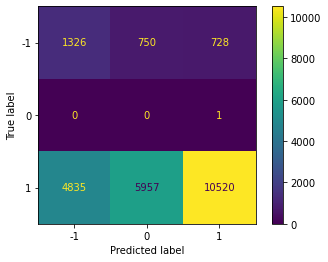

In [59]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.show()